https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import keras

# the data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
#print(train_images[0])

(60000, 28, 28)


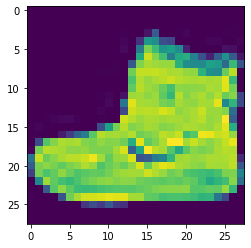

In [2]:
# view image
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

#view as csv
import pandas as pd
pd.DataFrame(train_images[0]).to_csv("image.csv")

In [3]:
# Scale images to the [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# row 3 in csv
print(train_images[0][3])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 0.
 0.         0.00392157 0.01568627 0.         0.         0.
 0.         0.00392157 0.00392157 0.        ]


In [4]:
#from keras import layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4997 - accuracy: 0.8230 - val_loss: 0.4204 - val_accuracy: 0.8503
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8653 - val_loss: 0.3901 - val_accuracy: 0.8589
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8790 - val_loss: 0.3813 - val_accuracy: 0.8658
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8863 - val_loss: 0.3971 - val_accuracy: 0.8602
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8919 - val_loss: 0.3415 - val_accuracy: 0.8793
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8975 - val_loss: 0.3556 - val_accuracy: 0.8759
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9007 - val_loss: 0.3502 - val_accuracy:

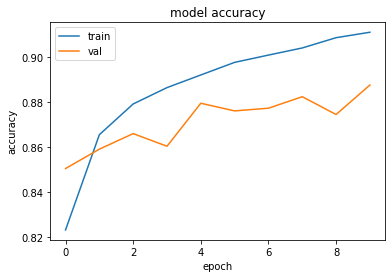

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

https://www.tensorflow.org/tutorials/images/cnn#add_dense_layers_on_top